Hitters league

In [1]:
# Import the necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path =  r'F:\project Robotronix\ISHANT PROJECT 2\HittersDataset.csv'
df = pd.read_csv(file_path)
df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

Pre-processing

In [4]:
class Info:
    #constructor
    def __init__(self,df):
        self.df = df
        self.rows = df.shape[0]
        self.cols = df.shape[1]
        self.head = df.head()
        self.tail = df.tail()
        self.missing_vals = df.isna().sum()
        self.dup_vals = df.duplicated().sum()
        self.not_null_df = None
        self.new_df = None
        self.y = None
    
        
        
    def display(self):
        print(f'No of rows we have : {self.rows}\n')
        print(f'No of columns we have : {self.cols}\n')
        print(f'Top 5 records in our Data\n : {self.head}\n')
        print(f'Bottom 5 records in our Data\n : {self.tail}\n')
        print(f'No of missing values\n : {self.missing_vals}\n')
        print(f'No of duplicate values\n : {self.dup_vals}\n')
        
        
    def cleaning(self):
        self.not_null_df = self.df.dropna()
#         return self.not_null_df
    
    
    def preprocessing(self):
        features = self.not_null_df.drop(['Player','NewLeague'],axis=1)
        labels = self.not_null_df["NewLeague"]
        cat_features = features.select_dtypes(exclude=['int', 'float'])
        num_features = features.select_dtypes(exclude=['object'])
        feature_ohe = pd.get_dummies(cat_features)
        self.new_df = pd.concat([num_features,feature_ohe], axis = 1).reset_index()
        self.y = labels.map({'A':0, 'N':1})
        return self.new_df, self.y
        

#object creation for Info class
obj = Info(df)

#Calling function through object
obj.display()

obj.cleaning()

#storing input and output features into two different variables
input_features, y = obj.preprocessing()

No of rows we have : 322

No of columns we have : 21

Top 5 records in our Data
 :               Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E   

In [5]:
#in above code we have removed the null values now checking whether it had removed or not
obj.not_null_df.isna().sum()

Player       0
AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [6]:
input_features

,index,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W
0,1,315,81,7,24,38,39,14,3449,835,...,414,375,632,43,10,475.0,0,1,0,1
1,2,479,130,18,66,72,76,3,1624,457,...,266,263,880,82,14,480.0,1,0,0,1
2,3,496,141,20,65,78,37,11,5628,1575,...,838,354,200,11,3,500.0,0,1,1,0
3,4,321,87,10,39,42,30,2,396,101,...,46,33,805,40,4,91.5,0,1,1,0
4,5,594,169,4,74,51,35,11,4408,1133,...,336,194,282,421,25,750.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,317,497,127,7,65,48,37,5,2703,806,...,311,138,325,9,3,700.0,0,1,1,0
259,318,492,136,5,76,50,94,12,5511,1511,...,451,875,313,381,20,875.0,1,0,1,0
260,319,475,126,3,61,43,52,6,1700,433,...,93,146,37,113,7,385.0,1,0,0,1
261,320,573,144,9,85,60,78,8,3198,857,...,420,332,1314,131,12,960.0,1,0,1,0


In [7]:
y

1      1
2      0
3      1
4      1
5      0
      ..
317    1
318    0
319    0
320    0
321    0
Name: NewLeague, Length: 263, dtype: int64

In [8]:
# function for splitting dataset into train test and validation
from sklearn.model_selection import train_test_split

def split_data(input_features, y):
    xtrain, xtest, ytrain, ytest = train_test_split(input_features, y, train_size=0.85, random_state=23)
    xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, train_size=0.85, random_state=23)
    
    return xtrain, xtest, ytrain, ytest, xval, yval

xtrain, xtest, ytrain, ytest, xval, yval = split_data(input_features, y)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(xval.shape)
print(yval.shape)

(189, 22)
(189,)
(40, 22)
(40,)
(34, 22)
(34,)


RIDGE MODEL

In [9]:
## Ridge regression model
from sklearn.metrics import *
from sklearn.linear_model import Ridge

def train_ridge( x_train, y_train, x_val, y_val, max_iter: int = int(1e8)):
    
    n_bootstraps = int(1e3)
    
    ridge_mean_auc = {}
    alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    coeffs = {}
    
    ridge_best_model = None
    ridge_best_alpha = None
    best_coeffs = None
    best_score = -np.inf
    
    for alpha in alpha_vals:
        aucs_ridge = []
        
        for iteration in range(1,n_bootstraps):
            
            ridge_model = Ridge(alpha=alpha, max_iter=max_iter)
            ridge_model.fit(x_train, y_train)
            model_preds = ridge_model.predict(x_val)
            ridge_auroc_score = roc_auc_score(y_val, model_preds)
            aucs_ridge.append(ridge_auroc_score)
        
        mean_score = np.mean(aucs_ridge) 
            
        ridge_mean_auc[alpha] = mean_score
        coeffs[alpha] = ridge_model.coef_
        
        if mean_score > best_score:
            best_score = mean_score
            ridge_best_alpha = alpha
            ridge_best_model = ridge_model
            ridge_best_coeffs = coeffs[ridge_best_alpha]       
        

    return ridge_mean_auc, ridge_best_coeffs, ridge_best_model, ridge_best_alpha
            
            
ridge_mean_auc_dict, ridge_best_coefficients, ridge_best_model, ridge_best_alpha = train_ridge(x_train=xtrain, y_train=ytrain, x_val=xval, y_val=yval)

print('mean auc score for all the given alphas :\n')
for k, v in ridge_mean_auc_dict.items():
    print('Alpha : ' +str(k) + '  mean auc : '+str(v))
    
print(f'Best alpha for Ridge :{ridge_best_alpha}')

mean auc score for all the given alphas :

Alpha : 0.001  mean auc : 0.8863636363636366
Alpha : 0.01  mean auc : 0.8863636363636366
Alpha : 0.1  mean auc : 0.8863636363636366
Alpha : 1  mean auc : 0.8863636363636366
Alpha : 10.0  mean auc : 0.9090909090909088
Alpha : 100.0  mean auc : 0.9318181818181817
Alpha : 1000.0  mean auc : 0.7878787878787878
Best alpha for Ridge :100.0


LASSO MODEL

In [10]:
## Lasso Regression model
from sklearn.linear_model import Lasso

def train_lasso( x_train, y_train, x_val, y_val, max_iter: int = int(1e8)):
    
    n_bootstraps = int(1e3)
    lasso_mean_auc = {}
    alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    coeffs = {}
    
    
    lasso_best_model = None
    lasso_best_alpha = None
    lasso_best_coef = None
    best_score = 0
    
    for alpha in alpha_vals:
        aucs_lasso = []
        
        for iteration in range(1,n_bootstraps):
            
            lasso_model = Lasso(alpha=alpha, max_iter=iteration)
            lasso_model.fit(x_train, y_train)
            lasso_model_preds = lasso_model.predict(x_val)
            lasso_auroc_score = roc_auc_score(y_val,lasso_model_preds)
            aucs_lasso.append(lasso_auroc_score)
            
        lasso_mean_auc[alpha] = np.mean(aucs_lasso)
        coeffs[alpha] = lasso_model.coef_
        mean_score = np.mean(aucs_lasso)

        
        if mean_score > best_score:
            best_score = mean_score
            lasso_best_alpha = alpha
            lasso_best_model = lasso_model
            lasso_best_coef = coeffs[lasso_best_alpha]
        
        
    return lasso_mean_auc, lasso_best_coef, lasso_best_model, lasso_best_alpha
            
            
lasso_mean_auc_dict, lasso_best_coef, lasso_best_model, lasso_best_alpha = train_lasso(x_train=xtrain, y_train=ytrain, x_val=xval, y_val=yval)

print('mean auc score for all the given alphas :\n')
for k, v in ridge_mean_auc_dict.items():
    print('Alpha : ' +str(k)+ '  mean auc : '+str(v))

print(f'Best alpha for Lasso : {lasso_best_alpha}')

mean auc score for all the given alphas :

Alpha : 0.001  mean auc : 0.8863636363636366
Alpha : 0.01  mean auc : 0.8863636363636366
Alpha : 0.1  mean auc : 0.8863636363636366
Alpha : 1  mean auc : 0.8863636363636366
Alpha : 10.0  mean auc : 0.9090909090909088
Alpha : 100.0  mean auc : 0.9318181818181817
Alpha : 1000.0  mean auc : 0.7878787878787878
Best alpha for Lasso : 0.1


In [ ]:
#ridge model coefficients

In [11]:

def ridge_coefficients(x_train, y_train, optimal_alpha, max_iter=int(1e8)):
    result = []
    best_model_ridge = Ridge(alpha=optimal_alpha, max_iter=max_iter)
    best_model_ridge.fit(x_train, y_train)
    result.append(best_model_ridge)
    result.append(best_model_ridge.coef_)
    
    result_tuple = tuple(result)
    
    return result_tuple


ridge_result_tuple = ridge_coefficients(x_train=xtrain, y_train=ytrain, optimal_alpha=ridge_best_alpha)

print(f'Results and coefficients for best Ridge model : \n {ridge_result_tuple}')

Results and coefficients for best Ridge model : 
 (Ridge(alpha=100.0, max_iter=100000000), array([-4.16695249e-04,  2.12030406e-04,  4.15307040e-04, -3.83988642e-03,
       -3.48709128e-03, -1.90781965e-03,  5.08724528e-03, -1.98509627e-02,
        3.88499560e-05,  9.06658347e-04,  1.52330462e-03, -1.02321545e-03,
       -9.03710902e-04, -2.97480997e-04,  3.49479902e-05, -1.93273626e-04,
        1.34715688e-03, -4.30803534e-05, -1.96239038e-01,  1.96239038e-01,
       -1.50759407e-03,  1.50759407e-03]))


### A-7: Lasso Coefficients

In [12]:
def lasso_coefficients(x_train, y_train, optimal_alpha, max_iter=int(1e8)):
    result = []
    coeffs = []
    best_model_lasso = Lasso(alpha=optimal_alpha, max_iter=max_iter)
    best_model_lasso.fit(x_train, y_train)
    result.append(best_model_lasso)
    
    result.append(best_model_lasso.coef_)  
    lasso_result_tuple = tuple(result)
    
    
    return lasso_result_tuple


lasso_result_tuple = lasso_coefficients(xtrain, ytrain, lasso_best_alpha)
print(f'Results and coefficients for best Lasso model :\n {lasso_result_tuple}')

Results and coefficients for best Lasso model :
 (Lasso(alpha=0.1, max_iter=100000000), array([-3.84830938e-04,  2.89233710e-04,  0.00000000e+00, -0.00000000e+00,
       -2.57823647e-03, -2.38771102e-03,  4.20746755e-03, -0.00000000e+00,
       -4.96009181e-05,  7.72760674e-04,  4.58766537e-04, -5.86509476e-04,
       -4.71158245e-04, -3.19338537e-04,  4.52324913e-05, -5.91620145e-05,
        0.00000000e+00, -4.46736998e-05, -4.31858981e-01,  7.54452680e-17,
       -0.00000000e+00,  0.00000000e+00]))


In [100]:
print(f'Ridge coefficients \n:{ridge_result_tuple[1]}')
print(f'\nLasso coefficients \n:{lasso_result_tuple[1]}')
df1 = pd.DataFrame(ridge_result_tuple[1], columns=['Ridge Coefficients'])
df2 = pd.DataFrame(lasso_result_tuple[1], columns=['Lasso Coefficients'])
pd.concat([df1, df2], axis=1)

Ridge coefficients 
:[-4.16695249e-04  2.12030406e-04  4.15307040e-04 -3.83988642e-03
 -3.48709128e-03 -1.90781965e-03  5.08724528e-03 -1.98509627e-02
  3.88499560e-05  9.06658347e-04  1.52330462e-03 -1.02321545e-03
 -9.03710902e-04 -2.97480997e-04  3.49479902e-05 -1.93273626e-04
  1.34715688e-03 -4.30803534e-05 -1.96239038e-01  1.96239038e-01
 -1.50759407e-03  1.50759407e-03]

Lasso coefficients 
:[-3.84830938e-04  2.89233710e-04  0.00000000e+00 -0.00000000e+00
 -2.57823647e-03 -2.38771102e-03  4.20746755e-03 -0.00000000e+00
 -4.96009181e-05  7.72760674e-04  4.58766537e-04 -5.86509476e-04
 -4.71158245e-04 -3.19338537e-04  4.52324913e-05 -5.91620145e-05
  0.00000000e+00 -4.46736998e-05 -4.31858981e-01  7.54452680e-17
 -0.00000000e+00  0.00000000e+00]


,Ridge Coefficients,Lasso Coefficients
0,-0.000417,-3.848309e-04
1,0.000212,2.892337e-04
2,0.000415,0.000000e+00
3,-0.003840,-0.000000e+00
4,-0.003487,-2.578236e-03
5,-0.001908,-2.387711e-03
6,0.005087,4.207468e-03
7,-0.019851,-0.000000e+00
8,0.000039,-4.960092e-05
9,0.000907,7.727607e-04


Ridge model Area Under Curve

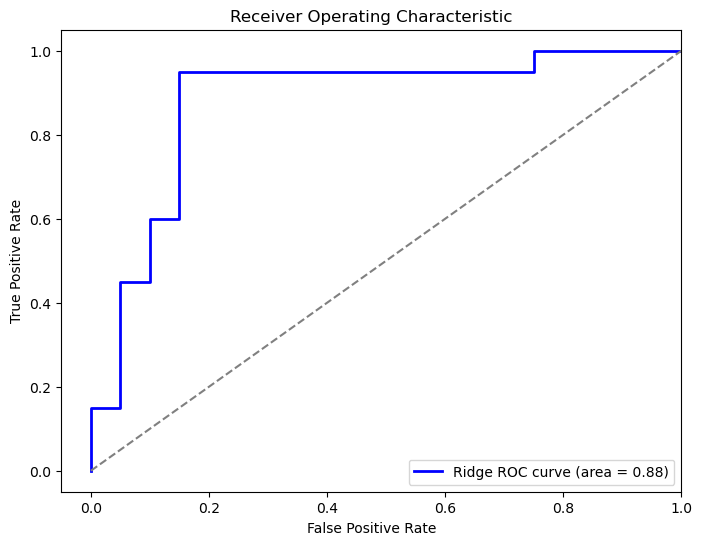

Ridge AUROC : 0.8799999999999999


In [101]:
def ridge_area_under_curve(model_R, x_test, y_test):
    
    r_preds = model_R.predict(x_test)
    ridge_fpr, ridge_tpr, ridge_thresold = roc_curve(y_test, r_preds)    
    r_roc_score = roc_auc_score(y_test, r_preds)

    
    plt.figure(figsize=(8, 6))
    plt.plot(ridge_fpr,ridge_tpr, color='blue', lw=2, label='Ridge ROC curve (area = %0.2f)' %r_roc_score)
    plt.plot([0,1], [0, 1], color='gray', linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return r_roc_score   
   

ridge_auc = ridge_area_under_curve(ridge_best_model, xtest, ytest)
print(f'Ridge AUROC : {ridge_auc}')

Lasso Model Area Under Curve

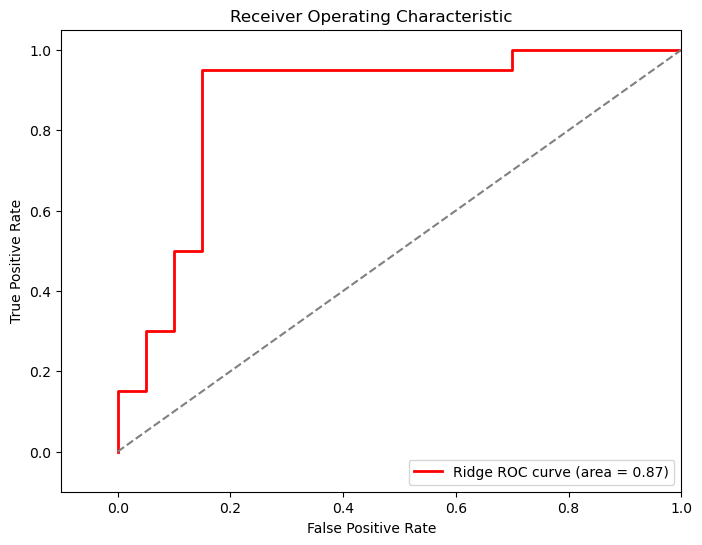

Lasso AURCO : 0.87


In [102]:
def lasso_area_under_curve(model_L, x_test, y_test):
   
    l_preds = model_L.predict(x_test)
    lasso_fpr, lasso_tpr, lasso_thresold = roc_curve(y_test, l_preds)    
    l_roc_score = roc_auc_score(y_test, l_preds)
    
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(lasso_fpr,lasso_tpr, color='red', lw=2, label='Ridge ROC curve (area = %0.2f)' %l_roc_score)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return l_roc_score 

lasso_auc = lasso_area_under_curve(lasso_best_model, xtest, ytest)
print(f'Lasso AURCO : {lasso_auc}')

Here is XGBoost classifier

In [104]:
import xgboost as xgb

def train_XGBoost( x_train, y_train, x_val, y_val):
    
    n_bootstraps = int(1e2)
    
    mean_xgboost_aucs = {}
    alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    for alpha in alpha_vals:
        aucs_xgboost = []
        for n in range(n_bootstraps):
            model = xgb.XGBRegressor(reg_alpha=alpha, n_estimators=n)
            model.fit(x_train, y_train)
            preds = model.predict(x_val)
            auc = roc_auc_score(y_val, preds)
            aucs_xgboost.append(auc)
            
        mean_xgboost_aucs[alpha] = np.mean(aucs_xgboost)
    
    return mean_xgboost_aucs
    
mean_xgboost_aucs = train_XGBoost(xtrain, ytrain, xval, yval)
print('The mean auroc values for each alpha\n : \n')

for k,v in mean_xgboost_aucs.items():
    print(f'Alpha : {k} - Mean auc {v}')

print(f'best alpha for this model is : {max(mean_xgboost_aucs, key=lambda k : mean_xgboost_aucs[k])}')

The mean auroc values for each alpha
 : 

Alpha : 0.001 - Mean auc 0.9039772727272724
Alpha : 0.01 - Mean auc 0.9108143939393935
Alpha : 0.1 - Mean auc 0.8933143939393937
Alpha : 1 - Mean auc 0.9075946969696966
Alpha : 10.0 - Mean auc 0.8966666666666672
Alpha : 100.0 - Mean auc 0.5
Alpha : 1000.0 - Mean auc 0.5
best alpha for this model is : 0.01


In [28]:
import xgboost as xgb

def train_XGBoost( x_train, y_train, x_val, y_val):
    n_bootstraps = int(1e2)
    
    mean_xgboost_aucs = {}
    alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    for alpha in alpha_vals:
        aucs_xgboost = []
        for n in range(n_bootstraps):
            model = xgb.XGBClassifier(objective="binary:logistic", reg_alpha=alpha, n_estimators=n)
            model.fit(x_train, y_train)
            preds = model.predict(x_val)
            auc = roc_auc_score(y_val, preds)
            aucs_xgboost.append(auc)
            
        mean_xgboost_aucs[alpha] = np.mean(aucs_xgboost)
    
    return mean_xgboost_aucs
    
mean_xgboost_aucs = train_XGBoost(xtrain, ytrain, xval, yval)
print('The mean auroc values for each alpha\n : \n')

for k,v in mean_xgboost_aucs.items():
    print(f'Alpha : {k} - Mean auc {v}')

print(f'best alpha for this model is : {max(mean_xgboost_aucs, key=lambda k : mean_xgboost_aucs[k])}')

The mean auroc values for each alpha
 : 

Alpha : 0.001 - Mean auc 0.9048863636363632
Alpha : 0.01 - Mean auc 0.907613636363636
Alpha : 0.1 - Mean auc 0.9062499999999996
Alpha : 1 - Mean auc 0.9087499999999994
Alpha : 10.0 - Mean auc 0.9087499999999994
Alpha : 100.0 - Mean auc 0.5
Alpha : 1000.0 - Mean auc 0.5
best alpha for this model is : 1


In [107]:
## Training our model with best alpha score we have got 
from sklearn.metrics import *
xgb_best_alpha = max(mean_xgboost_aucs, key=lambda k:mean_xgboost_aucs[k])
xg_model = xgb.XGBClassifier(objective="binary:logistic", reg_alpha=xgb_best_alpha, n_estimators=int(1e2))
xg_model.fit(xtrain, ytrain)
y_preds = xg_model.predict(xval)
xgb_pred_proba = xg_model.predict_proba(xval)[:,1]
print(classification_report(yval, y_preds))
print('\n')
print('Best alpha : {}'.format(xgb_best_alpha))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.85      0.92      0.88        12

    accuracy                           0.91        34
   macro avg       0.90      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



Best alpha : 0.01


In [108]:
xg_model.predict_proba(xval)[:,0]

array([9.9807864e-01, 9.9236393e-01, 8.4563494e-03, 2.0126045e-02,
       1.0302484e-02, 1.4542341e-03, 9.8715568e-01, 3.6395192e-03,
       9.9180603e-01, 9.9252349e-01, 5.2400231e-03, 5.0037563e-02,
       6.9603270e-01, 9.8786074e-01, 9.9443483e-01, 9.8632169e-01,
       3.5152435e-03, 6.0973763e-01, 9.7456217e-01, 3.2810211e-02,
       9.8489112e-01, 9.9717462e-01, 9.9806476e-01, 7.7661884e-01,
       2.6574731e-03, 9.9690866e-01, 8.5130095e-01, 2.2299290e-03,
       9.9654788e-01, 9.7565740e-01, 1.3398707e-02, 4.0525198e-04,
       9.9954158e-01, 9.9868500e-01], dtype=float32)

### C-3: Plot the ROC curve

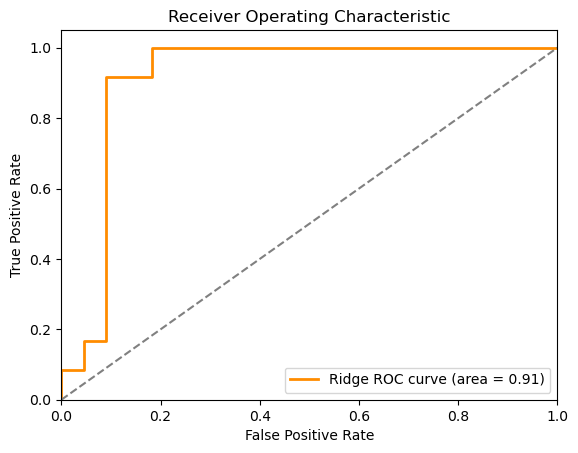

XGB auroc : 0.9128787878787878


In [109]:
xgb_fpr, xgb_tpr, _ = roc_curve(yval, xgb_pred_proba)
xgb_auroc = roc_auc_score(yval, xgb_pred_proba)
xgb_auc_score = auc(xgb_fpr, xgb_tpr)

plt.figure()
plt.plot(xgb_fpr,xgb_tpr, color='darkorange', lw=2, label='Ridge ROC curve (area = %0.2f)' %xgb_auroc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print(f'XGB auroc : {xgb_auroc}')

In [129]:
import time

#ridge model accuracy score
ridge = Ridge(alpha=ridge_best_alpha)
t1_start = time.time()
ridge.fit(xtrain,ytrain)
r_preds = ridge.predict(xval)
r_acc = r2_score(yval, r_preds)
t1_end = time.time()
print(f'R 2 score of Ridge : {np.round(r_acc,3)}')
print(f'Ridge process time : {t1_end-t1_start}\n')



lasso = Lasso(alpha=lasso_best_alpha)
t2_start = time.time()
lasso.fit(xtrain,ytrain)
l_preds = lasso.predict(xval)
l_acc = r2_score(yval, l_preds)
t2_end = time.time()
print(f'R 2 score of Lasso : {np.round(l_acc,3)}')
print(f'Ridge process time : {t2_end-t2_start}\n')



xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000)
t3_start = time.time()
xgb_model.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xval)
xgb_acc = accuracy_score(yval, xgb_pred)
t3_end = time.time()
print(f'Accuracy score of Ridge : {np.around(xgb_acc,3)}')
print(f'Ridge process time : {t3_end-t3_start}')


R 2 score of Ridge : 0.463
Ridge process time : 0.006503105163574219

R 2 score of Lasso : 0.494
Ridge process time : 0.013747453689575195

Accuracy score of Ridge : 0.882
Ridge process time : 0.6172609329223633


end